(224, 224, 3)


[ WARN:0@376.463] global loadsave.cpp:241 findDecoder imread_('image'): can't open/read file: check file path/integrity


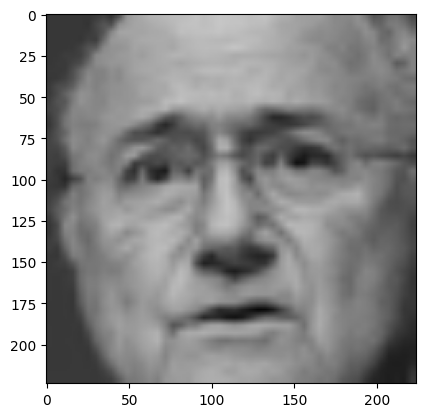

In [12]:
import cv2
from matplotlib import pyplot as plt
img=cv2.imread("im1.png")
import keras

cv2.imread("image",img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb=cv2.resize(img_rgb,(224,224))
print(img_rgb.shape)

plt.imshow(img_rgb)
plt.show()





In [92]:
#vgg16 model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import numpy as np

#block n1
model=keras.Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#block n2
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#block n3
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#block n4
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#block n5
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#top 
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(3,activation="softmax"))

result=model.predict(np.array([img_rgb]))

print(result)

model.build()
model.summary()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[[0.30562216 0.3183779  0.37599993]]


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_539 (Conv2D)             │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_540 (Conv2D)             │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_238               │ (None, 112, 112, 64)      │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_541 (Conv2D)             │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_542 (Conv2D)             │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_543 (Conv2D)             │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_239               │ (None, 56, 56, 128)       │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_544 (Conv2D)             │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_545 (Conv2D)             │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_546 (Conv2D)             │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_240               │ (None, 28, 28, 256)       │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_547 (Conv2D)             │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_548 (Conv2D)             │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_549 (Conv2D)             │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_241               │ (None, 14, 14, 512)       │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_550 (Conv2D)             │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_551 (Conv2D)             │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_552 (Conv2D)             │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_242               │ (None, 7, 7, 512)         │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_29 (Dense)                │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_30 (Dense)                │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 134,420,419 (512.77 MB)

 Trainable params: 134,420,419 (512.77 MB)

 Non-trainable params: 0 (0.00 B)